<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [75]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 65 kB 1.9 MB/s 
     |████████████████████████████████| 49 kB 3.5 MB/s 
     |████████████████████████████████| 45 kB 2.1 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639921 sha256=baec5e217535553c22a970e90c3cdf89c67bcde68524733aa74216ee22700edc
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 136 kB 5.3 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB

In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



### 1. Ряд с температурами каждый день в различных городах, для анализа я возьму температуру в Буэнос Айресе 
(https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities?resource=download)

In [77]:
!gdown https://drive.google.com/uc?id=1aN9xEmlx0Q_XgwEb63moXWY8B0HgplfN

Downloading...
From: https://drive.google.com/uc?id=1aN9xEmlx0Q_XgwEb63moXWY8B0HgplfN
To: /content/city_temperature.csv
100% 141M/141M [00:00<00:00, 167MB/s]


In [3]:
ts1 = pd.read_csv("city_temperature.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
ts1.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [5]:
ts1_BA = ts1[ts1["City"] == "Buenos Aires"]

In [6]:
ts1_BA.shape

(9266, 8)

In [7]:
# столбики, кроме дат и самих значений не нужны

ts1_BA.drop(columns=["Region", "Country", "State", "City"], inplace=True)
ts1_BA.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
ts1_BA['Date'] = pd.to_datetime(ts1_BA[["Year", "Month", "Day"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
ts1_BA.drop(columns=["Month", "Day", "Year"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
ts1_BA.head()

,AvgTemperature,Date
0,82.4,1995-01-01
1,75.1,1995-01-02
2,73.7,1995-01-03
3,77.1,1995-01-04
4,79.5,1995-01-05


In [11]:
ts1_BA[ts1_BA["AvgTemperature"] < 0].count() # заметим, что в некоторые года вместо нормального значения попадается -99, таких точек всего 35 - можем их выкинуть

AvgTemperature    35
Date              35
dtype: int64

In [12]:
ts1_BA = ts1_BA[ts1_BA["AvgTemperature"] > 0]

In [13]:
ts1_BA.isna().sum()

AvgTemperature    0
Date              0
dtype: int64

In [14]:
# сделаем разбиение на train/test - всего в выборке 25 лет, соответственно для 20% берем в тест 5 последних лет - с 2015
train_ts1 = ts1_BA[ts1_BA['Date'].dt.year < 2016]
test_ts1  = ts1_BA[ts1_BA['Date'].dt.year > 2015]

### 2) Ряд с месячной частотой - сырая нефть в США
(https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc)

In [90]:
!git clone https://github.com/rishabh89007/Time_Series_Datasets.git
!mv Time_Series_Datasets/Imports\ Crude\ Oil.csv .

fatal: destination path 'Time_Series_Datasets' already exists and is not an empty directory.
mv: cannot stat 'Time_Series_Datasets/Imports Crude Oil.csv': No such file or directory


In [15]:
# считаем файлы
ts2 = pd.read_csv('Imports Crude Oil.csv', header=0, names=["date", "Oil"])
ts2.head()

,date,Oil
0,2009 01,317275
1,2009 02,262339
2,2009 03,303897
3,2009 04,285934
4,2009 05,281147


In [16]:
ts2['Date'] = ts2['date'].apply(lambda x: pd.to_datetime(x[:-1], format='%Y %m'))
ts2.drop(columns=['date'], inplace=True)

In [17]:
ts2.dtypes

Oil              int64
Date    datetime64[ns]
dtype: object

In [18]:
ts2.head()

,Oil,Date
0,317275,2009-01-01
1,262339,2009-02-01
2,303897,2009-03-01
3,285934,2009-04-01
4,281147,2009-05-01


In [19]:
ts2.isna().sum()

Oil     0
Date    0
dtype: int64

In [20]:
ts2["Date"].min()

Timestamp('2009-01-01 00:00:00')

In [21]:
ts2["Date"].max()

Timestamp('2021-01-01 00:00:00')

In [22]:
ts2.shape

(145, 2)

In [23]:
# сделаем разбиение на train/test - всего в выборке 12 лет, значит в 20% для теста пойдут два последних года

train_ts2 = ts2[ts2['Date'].dt.year < 2019]
test_ts2  = ts2[ts2['Date'].dt.year > 2018]

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

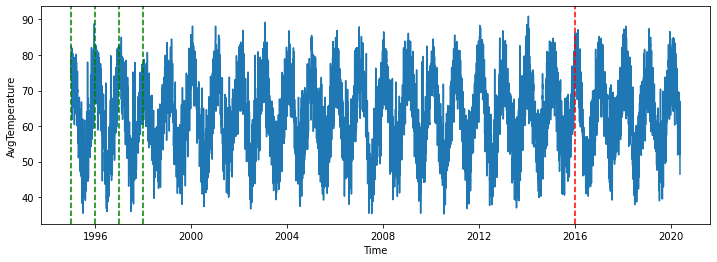

In [24]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(ts1_BA["Date"], ts1_BA["AvgTemperature"])
plt.ylabel('AvgTemperature')
plt.xlabel('Time')
plt.axvline(pd.to_datetime("2016-01-01"), color="red", linestyle="dashed")

plt.axvline(pd.to_datetime("1995-01-01"), color="green", linestyle="dashed")
plt.axvline(pd.to_datetime("1996-01-01"), color="green", linestyle="dashed")
plt.axvline(pd.to_datetime("1997-01-01"), color="green", linestyle="dashed")
plt.axvline(pd.to_datetime("1998-01-01"), color="green", linestyle="dashed")

plt.show()

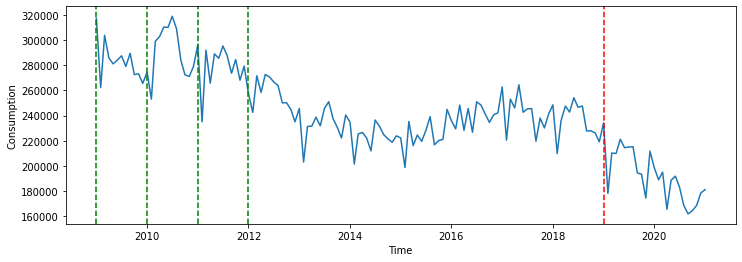

In [25]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(ts2["Date"], ts2["Oil"])
plt.xlabel('Time')
plt.ylabel('Consumption')

plt.axvline(pd.to_datetime("2019-01-01"), color="red", linestyle="dashed")

plt.axvline(pd.to_datetime("2012-01-01"), color="green", linestyle="dashed")
plt.axvline(pd.to_datetime("2009-01-01"), color="green", linestyle="dashed")
plt.axvline(pd.to_datetime("2010-01-01"), color="green", linestyle="dashed")
plt.axvline(pd.to_datetime("2011-01-01"), color="green", linestyle="dashed")

plt.show()

### Автокорреляционная функция для первого датасета

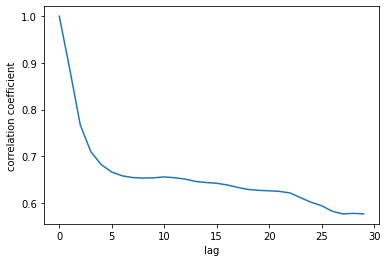

In [26]:
def autocorr(x,lags):
    mean=x.mean()
    var=np.var(x)
    xp=x-mean
    corr=np.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)

    return corr[:len(lags)]

data = train_ts1.AvgTemperature
lags = range(30)
corr = autocorr(data, lags)

plt.plot(lags, corr)

plt.xlabel('lag')
plt.ylabel('correlation coefficient')

plt.show()


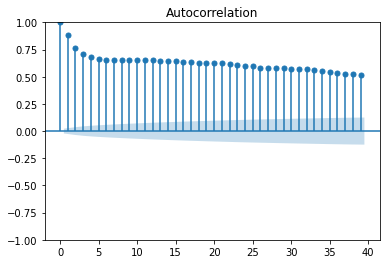

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf

sm.graphics.tsa.plot_acf(train_ts1["AvgTemperature"])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


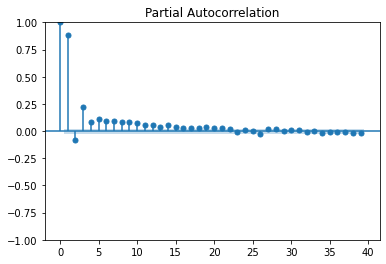

In [28]:
sm.graphics.tsa.plot_pacf(train_ts1["AvgTemperature"])
plt.show()

### Автокорреляционная функция для второго датасета

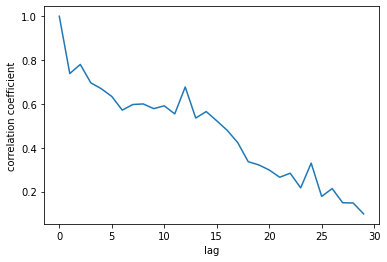

In [29]:
data = train_ts2.Oil
lags = range(30)
corr = autocorr(data, lags)

plt.plot(lags, corr)

plt.xlabel('lag')
plt.ylabel('correlation coefficient')

plt.show()

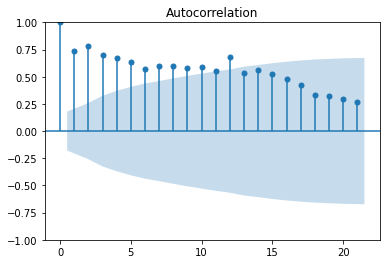

In [30]:
sm.graphics.tsa.plot_acf(train_ts2["Oil"])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


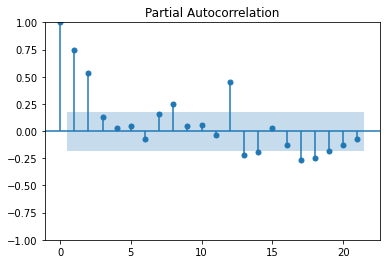

In [31]:
sm.graphics.tsa.plot_pacf(train_ts2["Oil"])
plt.show()

In [32]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

In [33]:
y_train_ts1 = train_ts1["AvgTemperature"]
X_train_ts1 = train_ts1["Date"]

y_test_ts1 = test_ts1["AvgTemperature"]
X_test_ts1 = test_ts1["Date"]

y_train_ts2 = train_ts2["Oil"]
X_train_ts2 = train_ts2["Date"]

y_test_ts2 = test_ts2["Oil"]
X_test_ts2 = test_ts2["Date"]

In [34]:
X_train_ts2

0     2009-01-01
1     2009-02-01
2     2009-03-01
3     2009-04-01
4     2009-05-01
         ...    
115   2018-08-01
116   2018-09-01
117   2018-10-01
118   2018-11-01
119   2018-12-01
Name: Date, Length: 120, dtype: datetime64[ns]

In [35]:
X_train_ts1

0      1995-01-01
1      1995-01-02
2      1995-01-03
3      1995-01-04
4      1995-01-05
          ...    
7664   2015-12-26
7665   2015-12-27
7666   2015-12-28
7667   2015-12-29
7668   2015-12-30
Name: Date, Length: 7650, dtype: datetime64[ns]

Оба ряда хорошо разбиваются по годам - паттерны повторяются каждый год (см. разделение зелеными линиями на графиках выше)

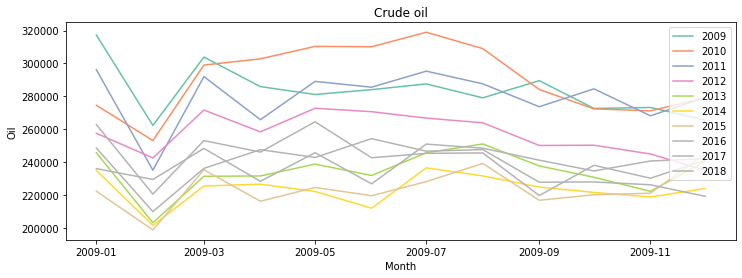

In [36]:
# ts1 - daily
# ts2 - monthly

period = 12
n = X_train_ts2.shape[0] // period
colors = [plt.cm.Set2(i) for i in range(n)] 
plt.figure(figsize=(12, 4))

for i in range(n):
    plt.plot(X_train_ts2[:period], y_train_ts2[period * i: period * (i+1)], c=colors[i], label=f"{2009+i}")

plt.title('Crude oil')
plt.ylabel('Oil')
plt.xlabel('Month')

plt.legend()
plt.show()

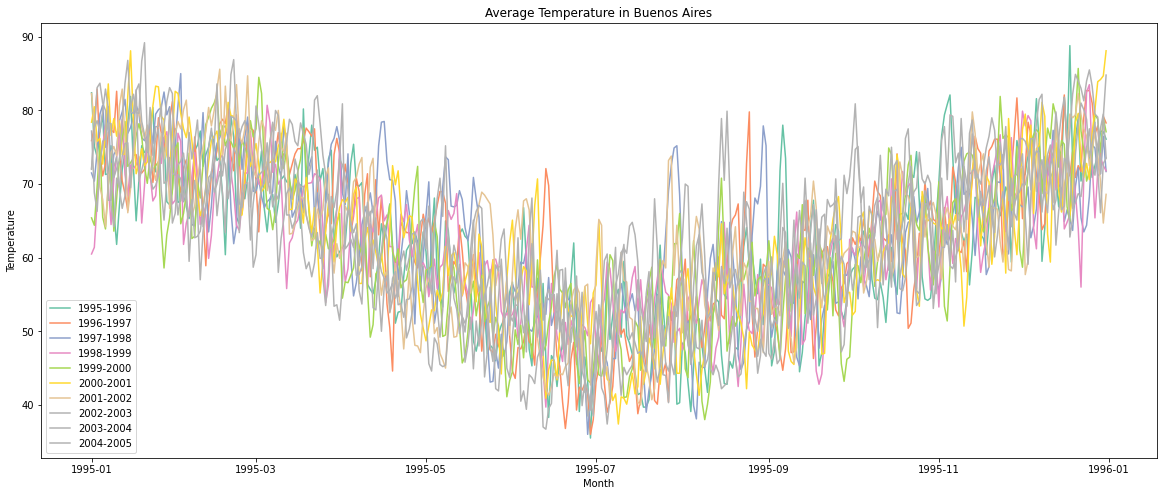

In [37]:
# ts1 - daily
# ts2 - monthly

period = 365
colors = [plt.cm.Set2(i) for i in range(10)] 

plt.figure(figsize=(20, 8))

for i in range(10): # чтобы не было очень много линий, нарисуем для первых 10 лет
    plt.plot(X_train_ts1[:period], y_train_ts1[period * i:period * (i+1)], c=colors[i], label=f"{1995 + i}-{1996 + i}")

plt.title('Average Temperature in Buenos Aires')
plt.ylabel('Temperature')
plt.xlabel('Month')

plt.legend()
plt.show()

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [114]:
!pip install sktime

### Первый вариант - константный прогноз

In [38]:
from sktime.forecasting.naive import NaiveForecaster

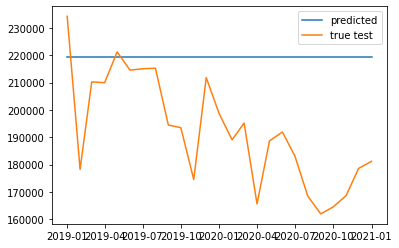

In [39]:
# ваш код обучения моделей здесь
forecaster = NaiveForecaster(strategy='last')
forecaster.fit(y_train_ts2)

y_pred = forecaster.predict(X_test_ts2.index)

# plt.plot(X_train2, y_train2, label='train data')
plt.plot(X_test_ts2, y_pred, label='predicted')
plt.plot(X_test_ts2, y_test_ts2, label='true test')

plt.legend()
plt.show()

In [40]:
# посчитайте метрики на test
from sklearn.metrics import mean_absolute_error as MAE

print(f"Mean Average Error of the Naive Forecaster is: {MAE(y_pred, y_test_ts2)}")

Mean Average Error of the Naive Forecaster is: 28255.44


### Второй вариант - с учетом сезонности

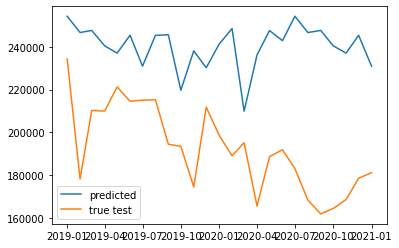

In [41]:
forecaster = NaiveForecaster(strategy="mean", window_length=22, sp=18)

forecaster.fit(y_train_ts2)

y_pred = forecaster.predict(X_test_ts2.index)

plt.plot(X_test_ts2, y_pred, label='predicted')
plt.plot(X_test_ts2, y_test_ts2, label='true test')

plt.legend()
plt.show()

In [42]:
print(f"Mean Average Error of the Naive Forecaster (seasonal) is: {MAE(y_pred, y_test_ts2)}")

Mean Average Error of the Naive Forecaster (seasonal) is: 48064.76


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [120]:
!pip install pmdarima

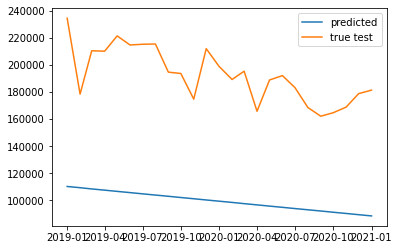

In [43]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
forecaster = ARIMA(order=(1, 1, 1), 
                   seasonal_order=(1, 0, 0, 12))
forecaster.fit(y_train_ts2)

y_pred = forecaster.predict(X_test_ts2.index)

plt.plot(X_test_ts2, y_pred, label='predicted')
plt.plot(X_test_ts2, y_test_ts2, label='true test')

plt.legend()
plt.show()

In [44]:
# посчитайте метрики на test
print(f"Mean Average Error of the ARIMA forecaster is: {MAE(y_pred, y_test_ts2)}")

Mean Average Error of the ARIMA forecaster is: 93212.81725186031


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [123]:
!pip install orbit-ml

In [45]:
from orbit.models.lgt import LGT
from orbit.models.dlt import DLT

### LGT

In [46]:
# ваш код обучения моделей здесь
lgt = LGT(response_col='Oil',
                     date_col='Date',
                     seasonality=12,
                     seed=11)

lgt.fit(df=train_ts2)

y_pred = lgt.predict(df=test_ts2)

y_pred.head()

,Date,prediction_5,prediction,prediction_95
0,2019-01-01,212893.210701,232121.692204,251677.709133
1,2019-02-01,177622.043195,203687.582426,223680.747109
2,2019-03-01,207540.027348,230257.814619,249336.901476
3,2019-04-01,195157.638722,227507.937978,251131.656865
4,2019-05-01,199196.705840,231316.358433,261848.780920


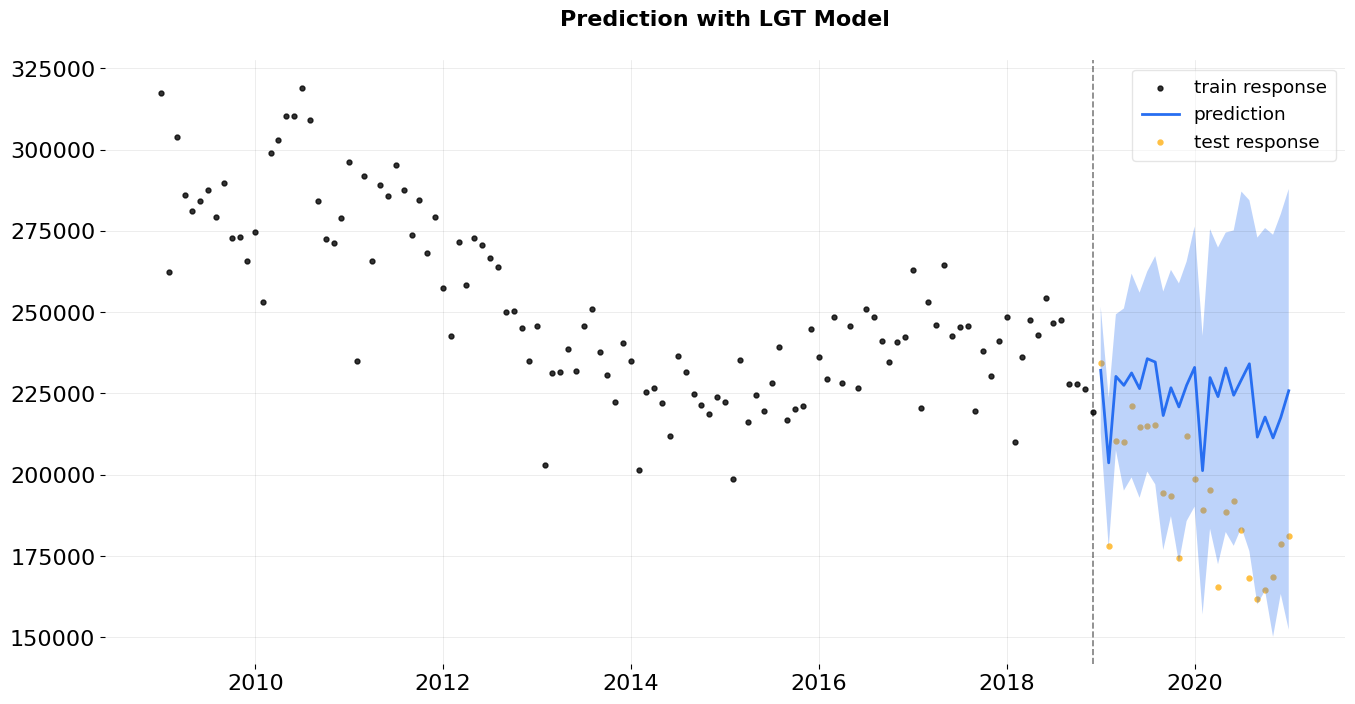

<AxesSubplot:title={'center':'Prediction with LGT Model'}>

In [47]:
from orbit.diagnostics.plot import plot_predicted_data

plot_predicted_data(
    training_actual_df=train_ts2, predicted_df=y_pred,
    date_col=lgt.date_col, actual_col=lgt.response_col,
    test_actual_df=test_ts2, title='Prediction with LGT Model')

In [48]:
# посчитайте метрики на test
print(f"Mean Average Error of the LGT forecaster is: {MAE(y_pred['prediction'], y_test_ts2)}")

Mean Average Error of the LGT forecaster is: 32150.937200129254


### DLT

In [49]:
dlt = DLT(response_col='Oil',
                     date_col='Date',
                     seasonality=12,
                     seed=11)

dlt.fit(df=train_ts2)

y_pred = dlt.predict(df=test_ts2)

y_pred.head()

,Date,prediction_5,prediction,prediction_95
0,2019-01-01,209252.670968,231251.512783,255365.910723
1,2019-02-01,179284.464255,200563.344618,221019.374195
2,2019-03-01,204219.843971,233131.655650,255298.351069
3,2019-04-01,194977.952390,226297.706758,258098.144635
4,2019-05-01,199647.691858,236702.918844,266804.804367


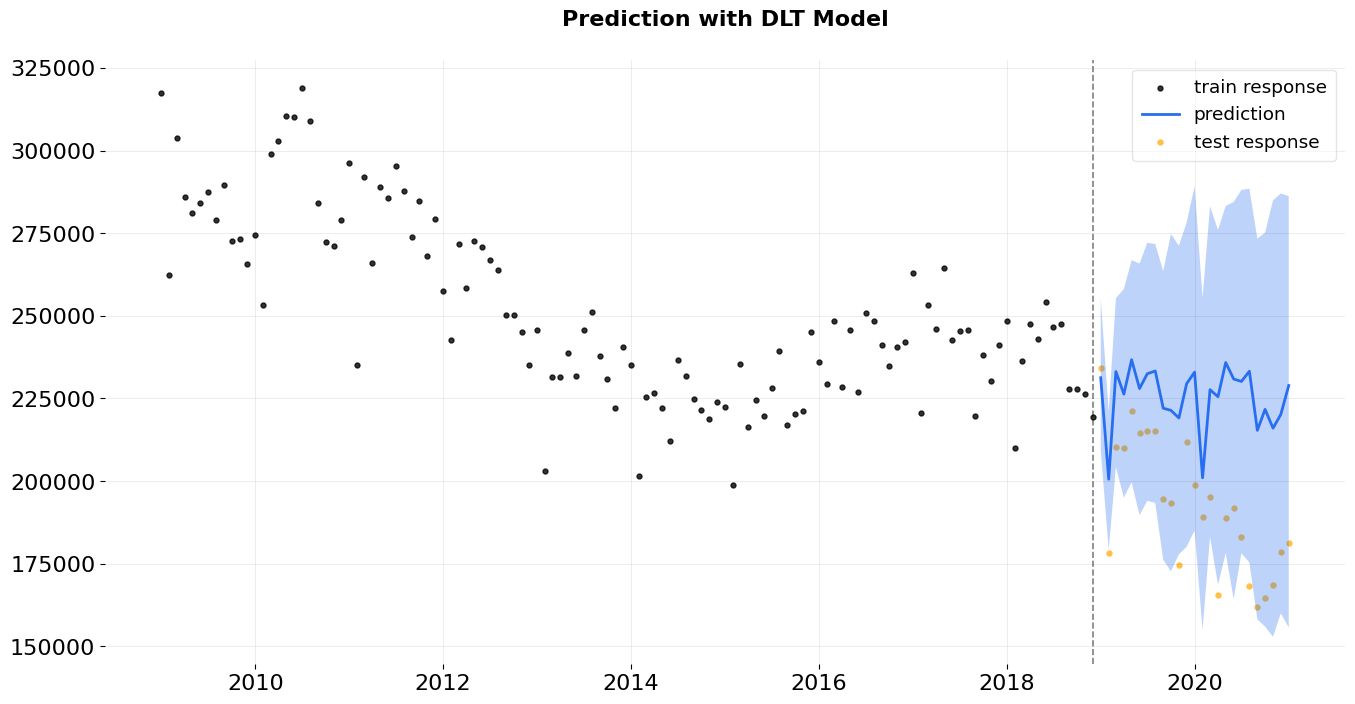

<AxesSubplot:title={'center':'Prediction with DLT Model'}>

In [50]:
plot_predicted_data(
    training_actual_df=train_ts2, predicted_df=y_pred,
    date_col=dlt.date_col, actual_col=dlt.response_col,
    test_actual_df=test_ts2, title='Prediction with DLT Model')

In [130]:
print(f"Mean Average Error of the DLT forecaster is: {MAE(y_pred['prediction'], y_test_ts2)}")

Mean Average Error of the DLT forecaster is: 33209.65932616352


### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

### ETS(AAA) (ExponentialSmoothing в sktime)

In [144]:
!pip install statsmodels

  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [51]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь

exp_sm = ExponentialSmoothing(sp=12)
exp_sm.fit(y_train_ts2)
y_pred = exp_sm.predict(X_test_ts2.index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [52]:
y_pred

239    228060.317167
240    228060.317167
241    228060.317167
242    228060.317167
243    228060.317167
244    228060.317167
245    228060.317167
246    228060.317167
247    228060.317167
248    228060.317167
249    228060.317167
250    228060.317167
251    228060.317167
252    228060.317167
253    228060.317167
254    228060.317167
255    228060.317167
256    228060.317167
257    228060.317167
258    228060.317167
259    228060.317167
260    228060.317167
261    228060.317167
262    228060.317167
263    228060.317167
dtype: float64

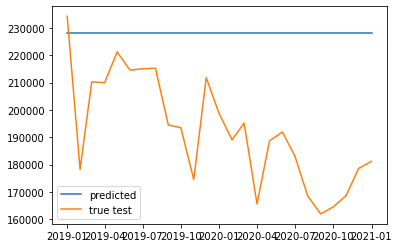

In [53]:
plt.plot(X_test_ts2, y_pred, label='predicted')
plt.plot(X_test_ts2, y_test_ts2, label='true test')

plt.legend()
plt.show()

In [55]:
# посчитайте метрики на test
print(f"Mean Average Error of ExponentialSmoothing Forecaster is: {MAE(y_pred, y_test_ts2)}")

Mean Average Error of ExponentialSmoothing Forecaster is: 36208.61179367141


### ETS с автоматическим выбором по AIC (AutoETS в sktime)

In [62]:
aets = AutoETS(trend="add", auto=True, sp=12)
aets.fit(y_train_ts2 / y_train_ts2.max())
y_pred = aets.predict(X_test_ts2.index)

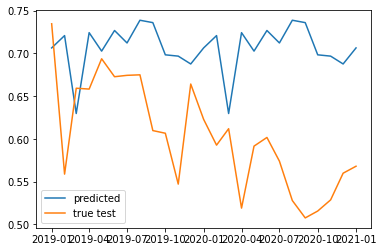

In [64]:
plt.plot(X_test_ts2, y_pred, label='predicted')
plt.plot(X_test_ts2, y_test_ts2/ y_train_ts2.max(), label='true test')

plt.legend()
plt.show()

In [65]:
print(f"Mean Average Error of AutoETS Forecaster is: {MAE(y_pred, y_test_ts2 / y_train_ts2.max()) * y_train_ts2.max()}")

Mean Average Error of AutoETS Forecaster is: 34515.197113937254


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

MAE list:
* ExponentialSmoothing Forecaster is: 36208.61179367141 \\
* AutoETS Forecaster is: 34515.197113937254 \\
* DLT forecaster is: 33209.65932616352 \\
* LGT forecaster is: 32150.937200129254 \\

Наименьшая ошибка у LGT модели -- график ее предсказаний с доверительными интервалами есть выше, просто скопирую:

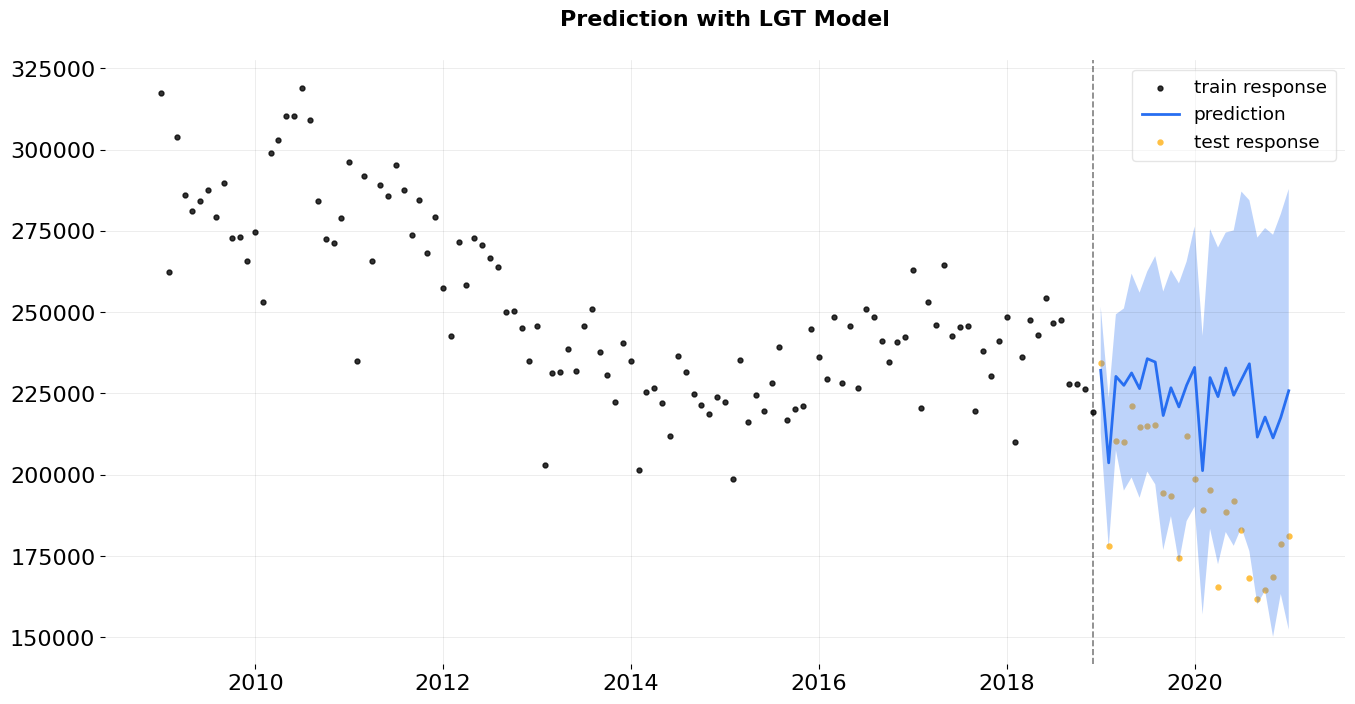

<AxesSubplot:title={'center':'Prediction with LGT Model'}>

In [66]:
# нарисуйте пресказания

lgt = LGT(response_col='Oil',
                     date_col='Date',
                     seasonality=12,
                     seed=11)

lgt.fit(df=train_ts2)

y_pred = lgt.predict(df=test_ts2)

plot_predicted_data(
    training_actual_df=train_ts2, predicted_df=y_pred,
    date_col=lgt.date_col, actual_col=lgt.response_col,
    test_actual_df=test_ts2, title='Prediction with LGT Model')

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

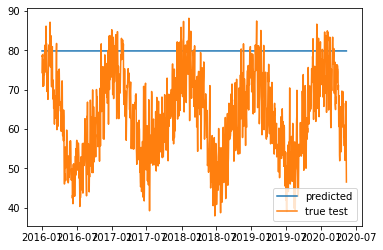

In [68]:
forecaster = NaiveForecaster(strategy='last')
forecaster.fit(y_train_ts1)

y_pred = forecaster.predict(X_test_ts1.index)

plt.plot(X_test_ts1, y_pred, label='predicted')
plt.plot(X_test_ts1, y_test_ts1, label='true test')

plt.legend()
plt.show()


In [69]:
# посчитайте метрики на test
print(f"Mean Average Error of the Naive Forecaster is: {MAE(y_pred, y_test_ts1)}")


Mean Average Error of the Naive Forecaster is: 16.337697659709043


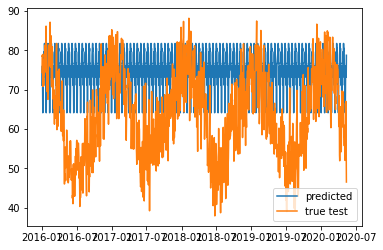

In [70]:
forecaster = NaiveForecaster(strategy="mean", window_length=22, sp=18)
forecaster.fit(y_train_ts1)

y_pred = forecaster.predict(X_test_ts1.index)

plt.plot(X_test_ts1, y_pred, label='predicted')
plt.plot(X_test_ts1, y_test_ts1, label='true test')

plt.legend()
plt.show()


In [71]:
print(f"Mean Average Error of the Naive Forecaster (seasonal) is: {MAE(y_pred, y_test_ts1)}")

Mean Average Error of the Naive Forecaster (seasonal) is: 13.254269449715368


In [72]:
train_ts1

,AvgTemperature,Date
0,82.4,1995-01-01
1,75.1,1995-01-02
2,73.7,1995-01-03
3,77.1,1995-01-04
4,79.5,1995-01-05
...,...,...
7664,79.6,2015-12-26
7665,83.5,2015-12-27
7666,86.0,2015-12-28
7667,82.8,2015-12-29


### KTR из orbit (1 балл).



In [76]:
# from orbit.models.ktrlite import KTRLiteMAP - говорит, что нет такой модели

from orbit.models import KTR

# ваш код обучения моделей здесь
forecaster = KTR(response_col='AvgTemperature',
                        date_col='Date',
                        seasonality=365
                        )

forecaster.fit(train_ts1)

pred_df = forecaster.predict(df=test_ts1)

/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:251: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')
/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:251: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')
INFO:root:Guessed max_plate_nesting = 1
/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:288: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')


In [77]:
pred_df

,Date,prediction_5,prediction,prediction_95
0,2016-01-01,67.018270,75.464606,84.902829
1,2016-01-02,66.860285,75.496897,87.835536
2,2016-01-03,64.774594,73.753258,85.358182
3,2016-01-04,66.795995,74.376475,83.821885
4,2016-01-05,66.212876,75.611249,85.481880
...,...,...,...,...
1576,2020-05-09,51.514235,60.233432,69.610186
1577,2020-05-10,52.226077,61.878150,73.391550
1578,2020-05-11,50.731655,60.153270,71.323423
1579,2020-05-12,51.685667,60.360079,70.671584


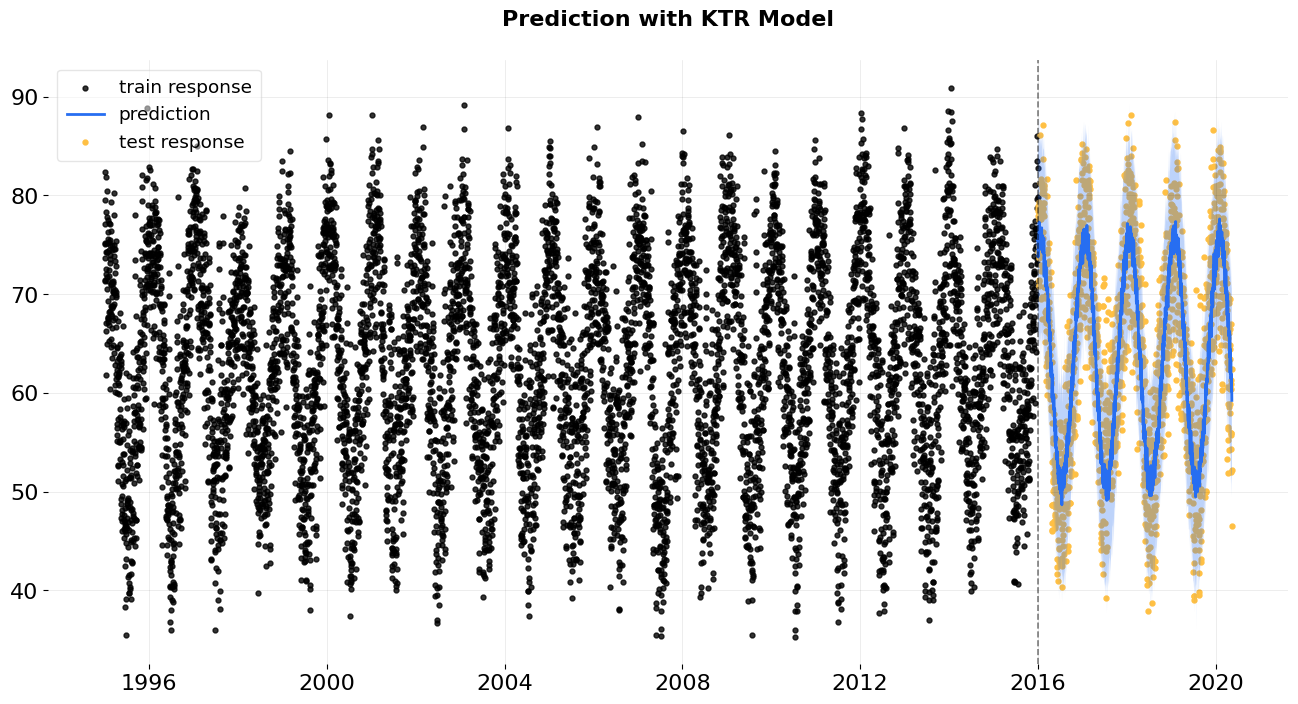

<AxesSubplot:title={'center':'Prediction with KTR Model'}>

In [78]:
plot_predicted_data(
    training_actual_df=train_ts1, predicted_df=pred_df,
    date_col=forecaster.date_col, actual_col=forecaster.response_col,
    test_actual_df=test_ts1, title='Prediction with KTR Model')

In [79]:
# посчитайте метрики на test
print(f"Mean Average Error of KTR Forecaster is: {MAE(pred_df['prediction'], y_test_ts1)}")

Mean Average Error of KTRLite Forecaster is: 4.955881678773894


### Phophet (1 балл).



In [80]:
!pip install prophet

In [82]:
train_ts1

,AvgTemperature,Date
0,82.4,1995-01-01
1,75.1,1995-01-02
2,73.7,1995-01-03
3,77.1,1995-01-04
4,79.5,1995-01-05
...,...,...
7664,79.6,2015-12-26
7665,83.5,2015-12-27
7666,86.0,2015-12-28
7667,82.8,2015-12-29


In [83]:
train_ts1_for_prophet = train_ts1.rename(columns={'AvgTemperature':'y', 'Date':'ds'})

In [88]:
test_ts1.shape

(1581, 2)

In [89]:
from prophet import Prophet

# ваш код обучения моделей здесь
forecaster = Prophet()

forecaster.fit(train_ts1_for_prophet)

future = forecaster.make_future_dataframe(periods=1581) # на сколько дней вперед мы предсказываем

pred_df = forecaster.predict(future)

pred_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
9226,2020-04-24,62.761115,54.797495,70.710600
9227,2020-04-25,62.575114,55.037978,71.090204
9228,2020-04-26,62.156288,54.214942,69.744290
9229,2020-04-27,62.190580,53.566817,70.222281
9230,2020-04-28,62.021410,53.872719,69.229174


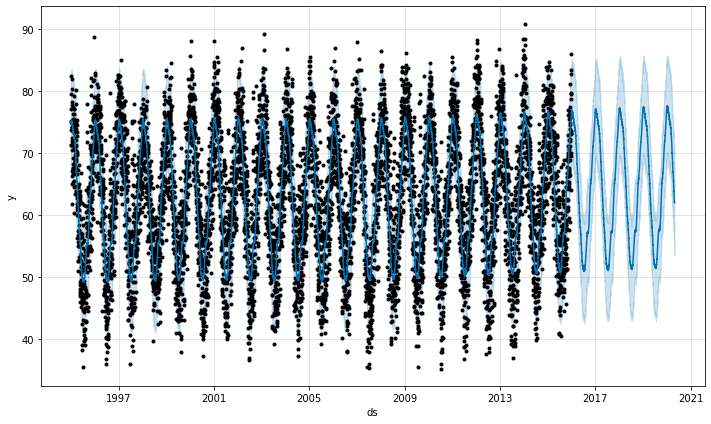

In [90]:
fig1 = forecaster.plot(pred_df)

In [91]:
# посчитайте метрики на test

print(f"Mean Average Error of the Prophet Forecaster is: {MAE(pred_df.iloc[-1581:, :]['yhat'], y_test_ts1)}")

Mean Average Error of the Prophet Forecaster is: 5.015920180148115


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

Лучшей моделью оказалась KTR

/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:251: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')
/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:251: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')
INFO:root:Guessed max_plate_nesting = 1
/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:288: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')


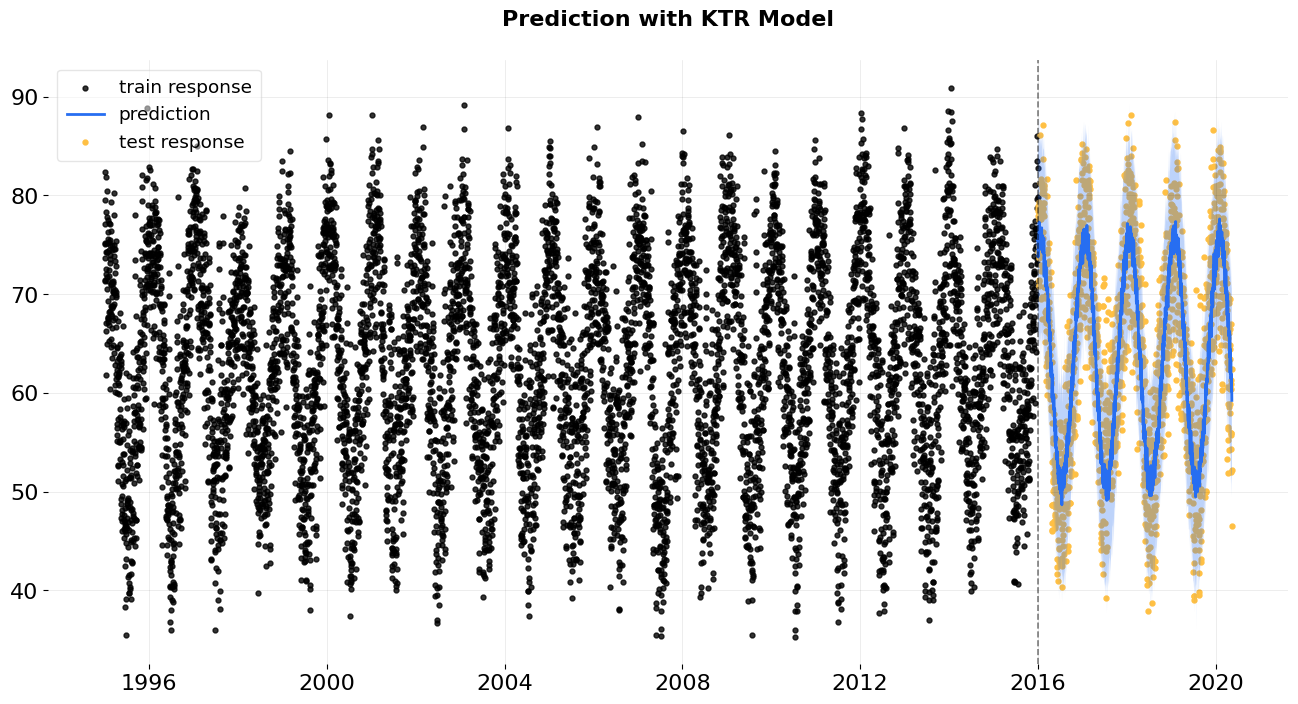

<AxesSubplot:title={'center':'Prediction with KTR Model'}>

In [94]:
forecaster = KTR(response_col='AvgTemperature',
                        date_col='Date',
                        seasonality=365
                        )

forecaster.fit(train_ts1)

pred_df = forecaster.predict(df=test_ts1)

plot_predicted_data(
    training_actual_df=train_ts1, predicted_df=pred_df,
    date_col=forecaster.date_col, actual_col=forecaster.response_col,
    test_actual_df=test_ts1, title='Prediction with KTR Model')

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [140]:
X_train_ts1_new = train_ts1.copy()
X_train_ts1_new["Year"] = X_train_ts1_new["Date"].apply(lambda date: date.year)
X_train_ts1_new["Month"] = X_train_ts1_new["Date"].apply(lambda date: date.month)
X_train_ts1_new["Day"] = X_train_ts1_new["Date"].apply(lambda date: date.day)

X_train_ts1_new.head()

,AvgTemperature,Date,Year,Month,Day
0,82.4,1995-01-01,1995,1,1
1,75.1,1995-01-02,1995,1,2
2,73.7,1995-01-03,1995,1,3
3,77.1,1995-01-04,1995,1,4
4,79.5,1995-01-05,1995,1,5


In [141]:
X_train_ts1_new.shape

(7650, 5)

In [142]:
X_test_ts1_new = test_ts1.copy()
X_test_ts1_new["Year"] = X_test_ts1_new["Date"].apply(lambda date: date.year)
X_test_ts1_new["Month"] = X_test_ts1_new["Date"].apply(lambda date: date.month)
X_test_ts1_new["Day"] = X_test_ts1_new["Date"].apply(lambda date: date.day)

X_test_ts1_new.head()

,AvgTemperature,Date,Year,Month,Day
7671,74.3,2016-01-01,2016,1,1
7672,78.6,2016-01-02,2016,1,2
7673,78.4,2016-01-03,2016,1,3
7674,78.9,2016-01-04,2016,1,4
7675,77.9,2016-01-05,2016,1,5


In [143]:
X_test_ts1_new.shape

(1581, 5)

In [144]:
X_train = X_train_ts1_new.drop(columns=["AvgTemperature", "Date"])
X_test = X_test_ts1_new.drop(columns=["AvgTemperature", "Date"])

In [145]:
X_train.head()

,Year,Month,Day
0,1995,1,1
1,1995,1,2
2,1995,1,3
3,1995,1,4
4,1995,1,5


In [146]:
X_train.shape

(7650, 3)

In [147]:
y_train = y_train_ts1
y_test = y_test_ts1

In [108]:
y_train.shape

(7650,)

In [105]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [148]:
#  SVR

svr_rbf = SVR(kernel="rbf", C=10, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_svr = svr_rbf.predict(X_test)

In [149]:
# GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred_gb = reg.predict(X_test)


In [150]:
# LGBMR

reg = LGBMRegressor()
reg.fit(X_train, y_train)
y_pred_lgbmr = reg.predict(X_test)

In [161]:
df = pd.DataFrame(columns=["Date", "True y", "Pred SVR", "Pred GradBoost", "Pred LGBMR"])
df["Date"] = X_test_ts1
df["True y"] = y_test_ts1
df["Pred SVR"] = y_pred_svr
df["Pred GradBoost"] = y_pred_gb
df["Pred LGBMR"] = y_pred_lgbmr

In [162]:
df.tail()

,Date,True y,Pred SVR,Pred GradBoost,Pred LGBMR
9261,2020-05-09,61.3,66.522567,60.161005,60.006447
9262,2020-05-10,67.0,66.614593,60.161005,60.111130
9263,2020-05-11,62.4,66.537513,59.854660,60.111130
9264,2020-05-12,52.2,66.456615,59.854660,60.340430
9265,2020-05-13,46.5,66.510044,59.854660,61.123652


In [154]:
df_m = df.melt(id_vars="Date")
df_m

,Date,variable,value
0,2016-01-01,True y,74.300000
1,2016-01-02,True y,78.600000
2,2016-01-03,True y,78.400000
3,2016-01-04,True y,78.900000
4,2016-01-05,True y,77.900000
...,...,...,...
6319,2020-05-09,Pred LGBMR,60.006447
6320,2020-05-10,Pred LGBMR,60.111130
6321,2020-05-11,Pred LGBMR,60.111130
6322,2020-05-12,Pred LGBMR,60.340430


<AxesSubplot:xlabel='Date', ylabel='value'>

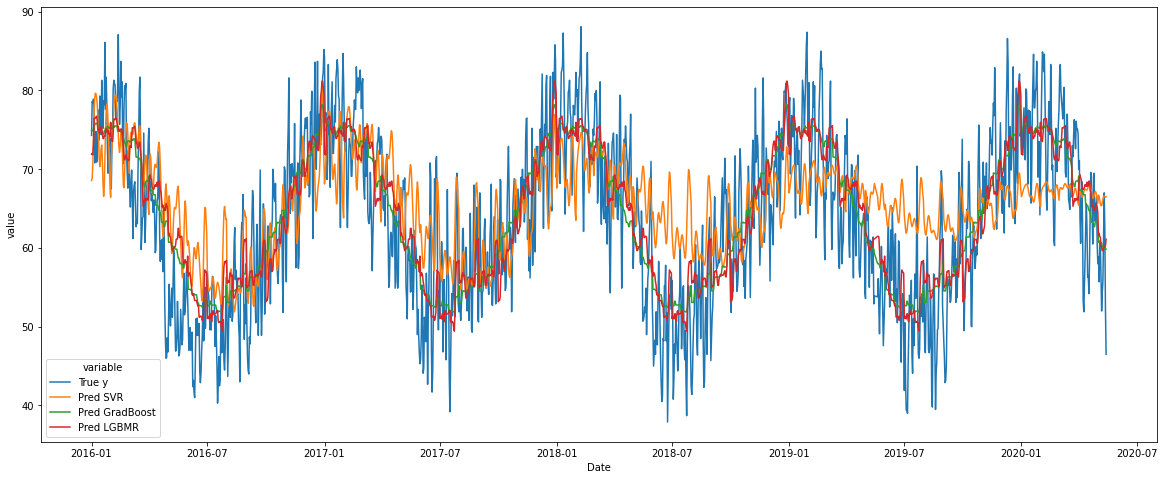

In [157]:
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.lineplot(data=df_m, x='Date', y='value', hue='variable')

Если не разделять дату на год/месяц/день, то получается почти константный прогноз у всех моделей - видимо, они прохо умеют работать с таким форматом данных. Тем не менее, если произвести такое разделение, модели справляются хорошо.

In [164]:
for model in ["Pred SVR", "Pred GradBoost", "Pred LGBMR"]:
  print(f"Mean Average Error of the {model} is: {MAE(df[model], df['True y'])}")

Mean Average Error of the Pred SVR is: 7.17920543716166
Mean Average Error of the Pred GradBoost is: 4.942166797594151
Mean Average Error of the Pred LGBMR is: 5.23590087001817


Можно заметить, что у градиентного бустинга и LGBMR качество сравнимо с forecasting моделями, протестированными выше.

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания